In [1]:
import pandas as pd
from catboost import CatBoostClassifier, Pool

from modeling import simple_split

In [2]:
train_df = pd.read_csv('train_df.csv')

### 1.1 Modeling

In [3]:
target_df = pd.read_csv('10_sec_target.csv')

In [4]:
(X_train, Y_train), (X_test, Y_test) = simple_split(train_df, target_df, fraction=0.8)
(X_train, Y_train), (X_val, Y_val) = simple_split(X_train, Y_train, fraction=0.8)
X_train.shape, X_val.shape, X_test.shape

((443948, 42), (110987, 42), (138734, 42))

In [5]:
print("Train positive fraction:", Y_train.mean())
print("Validation positive fraction:", Y_val.mean()) 
print("Test positive fraction:", Y_test.mean())

Train positive fraction: 10_sec    0.828597
dtype: float64
Validation positive fraction: 10_sec    0.794706
dtype: float64
Test positive fraction: 10_sec    0.776147
dtype: float64


In [6]:
train_pool = Pool(data=X_train, label=Y_train)
val_pool = Pool(data=X_val, label=Y_val)

In [7]:
model_d3 = CatBoostClassifier(
    iterations=5000,
    eval_metric='AUC',
    use_best_model=True,
    depth=3,
    learning_rate=0.05,
    loss_function='Logloss',
    class_weights=[1.0, 1.77],
)

model_d4 = CatBoostClassifier(
    iterations=5000,
    eval_metric='AUC',
    use_best_model=True,
    depth=4,
    loss_function='Logloss',
    class_weights=[1.0, 1.77],
)

model_d5 = CatBoostClassifier(
    iterations=5000,
    eval_metric='AUC',
    use_best_model=True,
    depth=5,
    learning_rate=0.05,
    loss_function='Logloss',
    class_weights=[1.0, 1.77],
)

In [ ]:
model_d3.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=500,
)

0:	test: 0.4994097	best: 0.4994097 (0)	total: 123ms	remaining: 10m 16s
1:	test: 0.6088646	best: 0.6088646 (1)	total: 148ms	remaining: 6m 9s
2:	test: 0.6275240	best: 0.6275240 (2)	total: 167ms	remaining: 4m 38s
3:	test: 0.6338503	best: 0.6338503 (3)	total: 188ms	remaining: 3m 54s
4:	test: 0.6781970	best: 0.6781970 (4)	total: 207ms	remaining: 3m 26s
5:	test: 0.6806598	best: 0.6806598 (5)	total: 231ms	remaining: 3m 12s
6:	test: 0.6828606	best: 0.6828606 (6)	total: 252ms	remaining: 2m 59s
7:	test: 0.6829721	best: 0.6829721 (7)	total: 275ms	remaining: 2m 51s
8:	test: 0.6844066	best: 0.6844066 (8)	total: 307ms	remaining: 2m 50s
9:	test: 0.6903989	best: 0.6903989 (9)	total: 341ms	remaining: 2m 50s
10:	test: 0.6901818	best: 0.6903989 (9)	total: 378ms	remaining: 2m 51s
11:	test: 0.6900350	best: 0.6903989 (9)	total: 403ms	remaining: 2m 47s
12:	test: 0.6904236	best: 0.6904236 (12)	total: 425ms	remaining: 2m 43s
13:	test: 0.6890199	best: 0.6904236 (12)	total: 447ms	remaining: 2m 39s
14:	test: 0.68

In [8]:
model_d4.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=500
)

Learning rate set to 0.070917
0:	test: 0.6187571	best: 0.6187571 (0)	total: 26.2ms	remaining: 2m 10s
1:	test: 0.6455546	best: 0.6455546 (1)	total: 49.5ms	remaining: 2m 3s
2:	test: 0.6392420	best: 0.6455546 (1)	total: 71.6ms	remaining: 1m 59s
3:	test: 0.6540812	best: 0.6540812 (3)	total: 94.7ms	remaining: 1m 58s
4:	test: 0.6549108	best: 0.6549108 (4)	total: 116ms	remaining: 1m 55s
5:	test: 0.6710915	best: 0.6710915 (5)	total: 138ms	remaining: 1m 54s
6:	test: 0.6824835	best: 0.6824835 (6)	total: 159ms	remaining: 1m 53s
7:	test: 0.6828666	best: 0.6828666 (7)	total: 178ms	remaining: 1m 51s
8:	test: 0.6897282	best: 0.6897282 (8)	total: 200ms	remaining: 1m 51s
9:	test: 0.6891682	best: 0.6897282 (8)	total: 223ms	remaining: 1m 51s
10:	test: 0.6906199	best: 0.6906199 (10)	total: 241ms	remaining: 1m 49s
11:	test: 0.6916495	best: 0.6916495 (11)	total: 262ms	remaining: 1m 49s
12:	test: 0.6918697	best: 0.6918697 (12)	total: 285ms	remaining: 1m 49s
13:	test: 0.6911304	best: 0.6918697 (12)	total: 309

In [9]:
model_d5.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=500
)

0:	test: 0.6187601	best: 0.6187601 (0)	total: 31.9ms	remaining: 2m 39s
1:	test: 0.6666257	best: 0.6666257 (1)	total: 57.4ms	remaining: 2m 23s
2:	test: 0.6737890	best: 0.6737890 (2)	total: 86.3ms	remaining: 2m 23s
3:	test: 0.6787783	best: 0.6787783 (3)	total: 107ms	remaining: 2m 13s
4:	test: 0.6766678	best: 0.6787783 (3)	total: 134ms	remaining: 2m 13s
5:	test: 0.6759989	best: 0.6787783 (3)	total: 160ms	remaining: 2m 13s
6:	test: 0.6755719	best: 0.6787783 (3)	total: 184ms	remaining: 2m 10s
7:	test: 0.6870374	best: 0.6870374 (7)	total: 211ms	remaining: 2m 11s
8:	test: 0.6944213	best: 0.6944213 (8)	total: 245ms	remaining: 2m 15s
9:	test: 0.6924364	best: 0.6944213 (8)	total: 273ms	remaining: 2m 16s
10:	test: 0.6912000	best: 0.6944213 (8)	total: 295ms	remaining: 2m 14s
11:	test: 0.6917833	best: 0.6944213 (8)	total: 325ms	remaining: 2m 15s
12:	test: 0.6951889	best: 0.6951889 (12)	total: 346ms	remaining: 2m 12s
13:	test: 0.6950364	best: 0.6951889 (12)	total: 371ms	remaining: 2m 12s
14:	test: 0

In [10]:
not_active_X = X_test[~X_test.active_area].reset_index(drop='index')
not_active_Y= Y_test[~X_test.active_area].reset_index(drop='index')
not_active_pool = Pool(data=not_active_X, label=not_active_Y)
not_active_Y.value_counts()

10_sec
True      1758
False     1499
Name: count, dtype: int64

In [11]:
passive_X = X_test[X_test.passive_area].reset_index(drop='index')
passive_Y = Y_test[X_test.passive_area].reset_index(drop='index')
passive_pool = Pool(data=passive_X, label=passive_Y)
passive_Y.value_counts()

10_sec
True      1689
False      553
Name: count, dtype: int64

In [12]:
active_X = X_test[X_test.active_area].reset_index(drop='index')
active_Y = Y_test[X_test.active_area].reset_index(drop='index')
active_pool = Pool(data=active_X, label=active_Y)
active_Y.value_counts()

10_sec
True      105920
False      29557
Name: count, dtype: int64

In [23]:
from metrics import calculate_metrics

AUC: 0.9298
AP: 0.9235
Precision: 0.8658
Recall: 0.8294


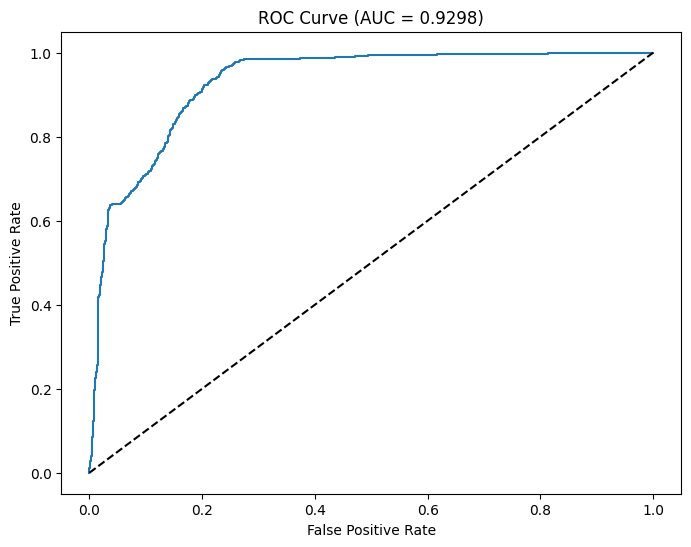

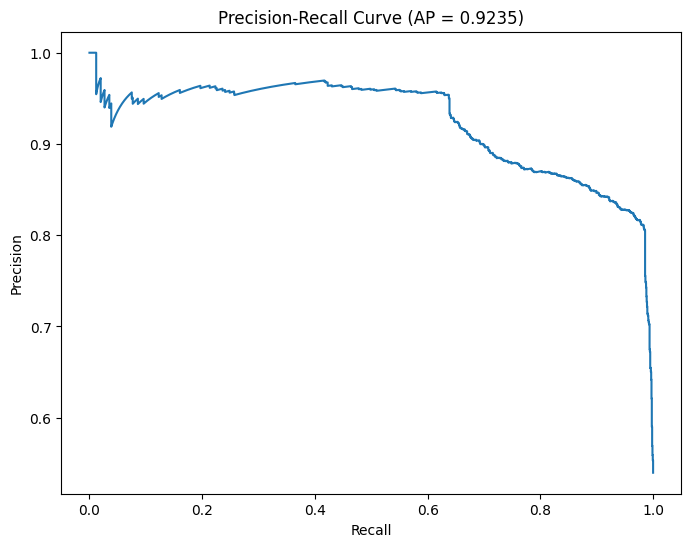

In [24]:
calculate_metrics(model_d5, not_active_pool, 'metrics/modeling_10_sec_momentum/non_active')

AUC: 0.8559
AP: 0.9337
Precision: 0.8761
Recall: 0.8626


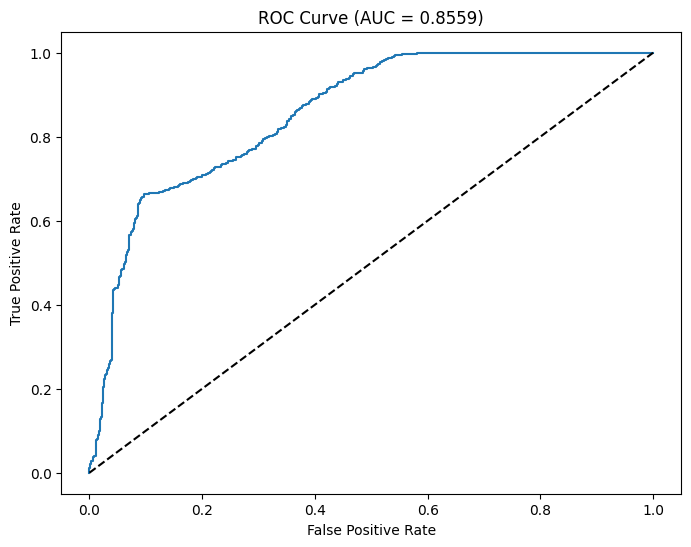

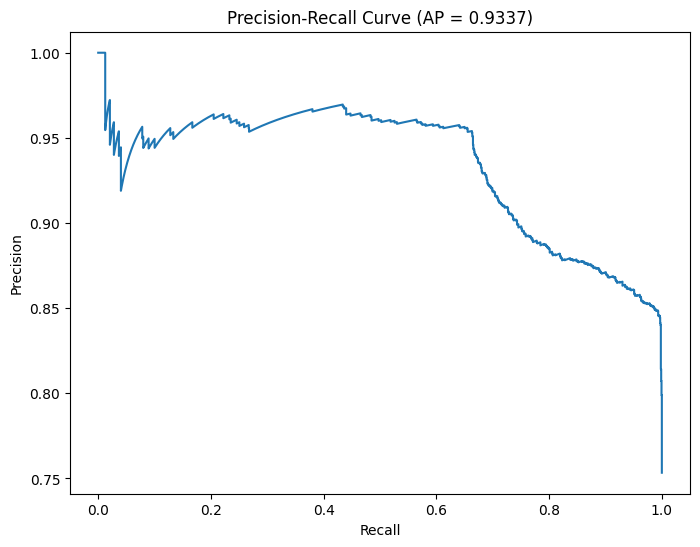

In [25]:
calculate_metrics(model_d5, passive_pool, 'metrics/modeling_10_sec_momentum/passive')

AUC: 0.7248
AP: 0.8942
Precision: 0.7853
Recall: 0.9963


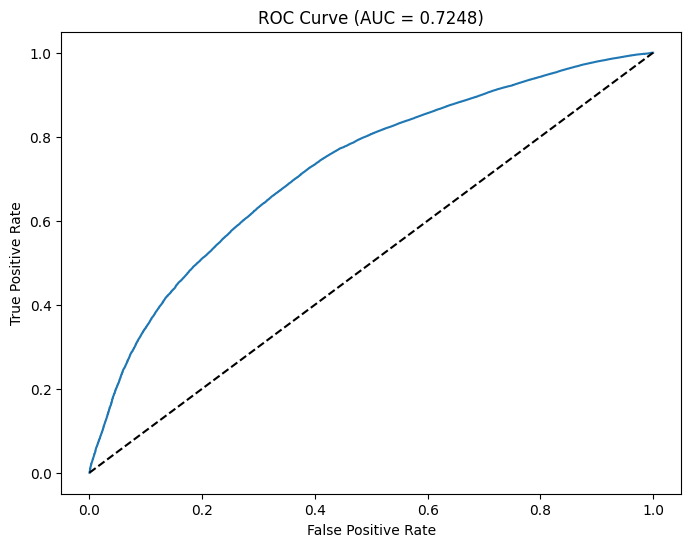

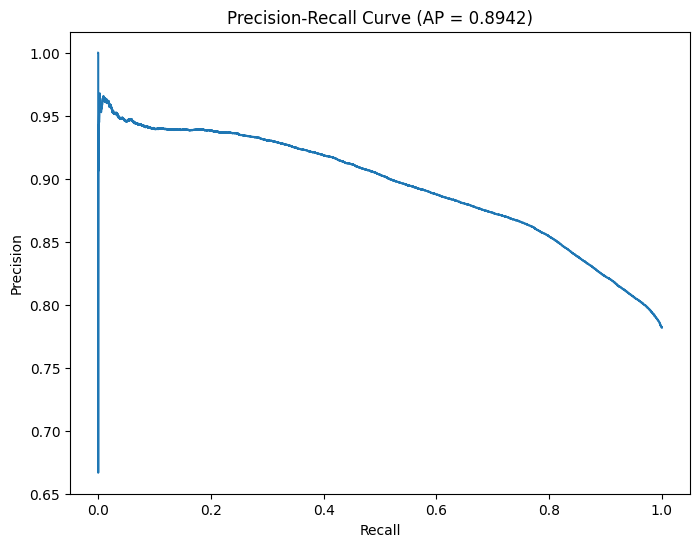

In [26]:
calculate_metrics(model_d5, active_pool, 'metrics/modeling_10_sec_momentum/active')